#import all the required modules 

In [1]:
import tensorflow as tf 
import numpy as np
import os
import cv2
from tqdm import tqdm
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

#Get the data set from the folder into the directories

In [2]:
base_dir = 'E:dataset/leaf and Vehicle dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
CATEGORIES=["Vehicle","leaf"]
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'leaf')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Vehicle')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'leaf')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Vehicle')
DATADIR='E:dataset/leaf and Vehicle dataset/train'



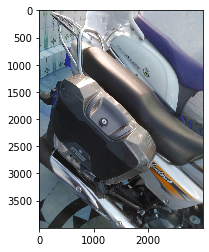

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

#Resize the images

In [4]:
IMG_SIZE=100
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

In [ ]:
#create the training data set

In [5]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
create_training_data()

print(len(training_data))

100%|██████████| 98/98 [00:12<00:00,  7.92it/s]

223


In [ ]:
#Convolution neural network and designing the model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#this function is used to stop the training when the desired accuracy is acquired

In [9]:
class Callbacks(tf.keras.callbacks.Callback):
        
        def on_epoch_end(self, epoch, logs={}):
            # YOUR CODE SHOULD START HERE
            if (logs.get('acc') >= 0.80):
                print('\nReached 99.8% accuracy so cancelling training!')
                self.model.stop_training = True
    # YOUR CODE SHOULD END HERE
mCallback=Callbacks()
    # YOUR CODE ENDS HERE

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
train_generator = train_datagen.flow_from_directory(
      'E:/dataset/leaf and Vehicle dataset/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
         'E:/dataset/leaf and Vehicle dataset/validation',
        target_size=(150, 150),
        batch_size=3,
        class_mode='binary')

Found 223 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=2,  # 1000 images = batch_size * steps
     verbose=2, callbacks=[mCallback])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/10
2/2 - 7s - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6814 - val_acc: 0.5000
Epoch 2/10
2/2 - 8s - loss: 0.7102 - acc: 0.3750 - val_loss: 0.6656 - val_acc: 0.6667
Epoch 3/10
2/2 - 8s - loss: 0.6674 - acc: 0.6250 - val_loss: 0.6769 - val_acc: 0.5000
Epoch 4/10
2/2 - 8s - loss: 0.7026 - acc: 0.5938 - val_loss: 0.6282 - val_acc: 1.0000
Epoch 5/10
2/2 - 8s - loss: 0.6496 - acc: 0.5938 - val_loss: 0.6056 - val_acc: 0.5000
Epoch 6/10
2/2 - 9s - loss: 0.6379 - acc: 0.6875 - val_loss: 0.5996 - val_acc: 0.5000
Epoch 7/10
2/2 - 9s - loss: 0.6015 - acc: 0.7419 - val_loss: 0.5352 - val_acc: 0.8333
Epoch 8/10

Reached 99.8% accuracy so cancelling training!
2/2 - 9s - loss: 0.5324 - acc: 0.8750 - val_loss: 0.4844 - val_acc: 0.8333


#predicting the output of the model providing an image path
#if the output is 0 then it belongs to 1st class
#if the output is  then it belongs to 2nd class


[[0.]]


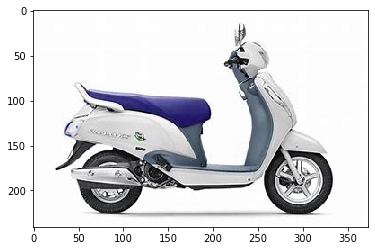

In [31]:
import numpy as np
from keras.preprocessing import image
path = 'E:/data set/download (1).jpg'
img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)

print(classes)
img=cv2.imread(path)
#img='E:/data set/download (1).jpg'
plt.imshow(img,cmap="gray")
plt.show()

[[1.]]


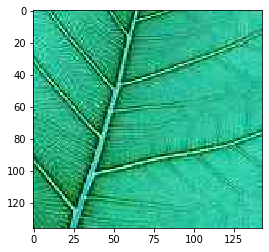

In [32]:
import numpy as np
from keras.preprocessing import image
path = 'E:/data set/download (2).jpg'
img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)

print(classes)
img=cv2.imread(path)
#img='E:/data set/download (1).jpg'
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
#plot the loss and accuracy 

Text(0.5, 1.0, 'Training and validation loss')

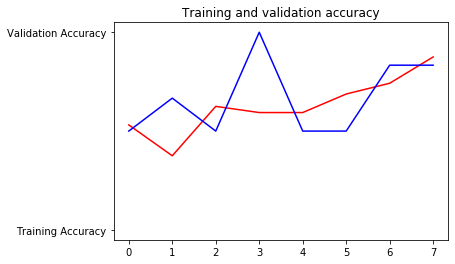

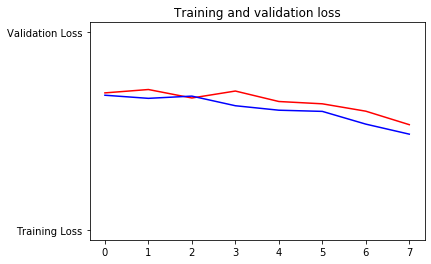

In [23]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

3.889e-24
